<a href="https://colab.research.google.com/github/Hanh-Nong/StatisticalLearning/blob/master/Project03_part2_and_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 2. Multi-class logistic regression using Stochastic Gradient Descent

#### Set up

In [0]:
import tensorflow as tf

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
np.random.seed(7)

In [0]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

In [0]:
#normalized:
X_train = X_train/255.0
X_test = X_test/255.0

In [0]:
N_train, numRows, numCols = X_train.shape
X_train_reshape = np.reshape(X_train, (N_train, numRows*numCols))
X_train3 = np.reshape(X_train, (N_train, numRows*numCols))

N, d = X_train_reshape.shape
X_train_aug = np.insert(X_train_reshape,0,1, axis = 1)
Y_oneHot = pd.get_dummies(Y_train).values

In [0]:
N_test = X_test.shape[0]
X_test = np.reshape(X_test, (N_test, numRows*numCols))

#### Define functions

In [0]:
def softmax(u):
  expu = np.exp(u)
  return expu/np.sum(expu)

def crossEntropy(p,q):
  return -np.vdot(p, np.log(q))

#assume feature vectors augmented already
def eval_L(X, Y, beta):
  N = X.shape[0]
  L = 0.0
  for i in range(N):
    XiHat = X[i]
    Yi = Y[i]
    qi = softmax(beta @ XiHat)
    L += crossEntropy(Yi,qi)
  return L

def logReg_SGD(X, Y, alpha):
  N_train, numRows, numCols = X.shape
  X_train_aug = np.reshape(X, (N_train, numRows*numCols))
  Y_train_oneHot = pd.get_dummies(Y).values #turn dataframe to numpy array
  numEpochs = 5
  N, d = X_train_aug.shape
  X_train_aug = np.insert(X_train_aug,0,1, axis = 1)
  K = Y_train_oneHot.shape[1]
  beta = np.zeros((K, d+1))
  Lvals =[]
  for ep in range(numEpochs):
    L = eval_L(X_train_aug, Y_train_oneHot, beta)
    Lvals.append(L)
    print("Epoch is: " + str(ep) + " Cost is: " + str(L))
    prm = np.random.permutation(N)
    for i in prm:
      XiHat = X_train_aug[i]
      Yi = Y_train_oneHot[i]
      qi = softmax(beta @ XiHat)
      grad_Li = np.outer(qi - Yi, XiHat)
      beta = beta - alpha*grad_Li
  return beta, Lvals


In [0]:
def predictLabels(X,beta):
  X = np.insert(X, 0, 1, axis = 1)
  N = X.shape[0]
  predictions = []
  probabilities = []
  for i in range(N):
    XiHat = X[i]
    qi = softmax(beta @ XiHat)
    k = np.argmax(qi)
    predictions.append(k)
    probabilities.append(np.max(qi))
  return predictions, probabilities


In [0]:
def accuracy(X_test, Y_test, beta):
  predictions, prob = predictLabels(X_test, beta)
  prob = np.array(prob)
  agreement = (predictions == Y_test)
  sortedIdxs = np.argsort(prob)
  sortedIdxs = sortedIdxs[::-1]
  numCorrect = 0

  for i in range(N_test):
    if predictions[i] == Y_test[i]:
      numCorrect += 1

  accuracy = round(numCorrect/N_test,2)
  #print('accuracy: ' + str(accuracy))
  return accuracy

#### Run regression using SGD using various learning rate, and test accuracy

In [0]:
SGD1 = logReg_SGD(X_train, Y_train, alpha=.01)
SGD2 = logReg_SGD(X_train, Y_train, alpha=.002)
SGD3 = logReg_SGD(X_train, Y_train, alpha=.0005)
SGD4 = logReg_SGD(X_train, Y_train, alpha=.008)

Epoch is: 0 Cost is: 138155.10557972503
Epoch is: 1 Cost is: 18221.3486073746
Epoch is: 2 Cost is: 17525.891841272733
Epoch is: 3 Cost is: 16377.754020405653
Epoch is: 4 Cost is: 15993.514441290967
Epoch is: 0 Cost is: 138155.10557972503
Epoch is: 1 Cost is: 20361.7399118619
Epoch is: 2 Cost is: 18591.199954007923
Epoch is: 3 Cost is: 17777.594907210518
Epoch is: 4 Cost is: 17286.461336372053
Epoch is: 0 Cost is: 138155.10557972503
Epoch is: 1 Cost is: 26440.75704633365
Epoch is: 2 Cost is: 22802.921021190807
Epoch is: 3 Cost is: 21195.163470287018
Epoch is: 4 Cost is: 20293.28268525259
Epoch is: 0 Cost is: 138155.10557972503
Epoch is: 1 Cost is: 18586.092203509812
Epoch is: 2 Cost is: 17084.923939514425
Epoch is: 3 Cost is: 16210.71575852877
Epoch is: 4 Cost is: 16338.481127023204


In [0]:
a1 = accuracy(X_test, Y_test, SGD1[0])
a2 = accuracy(X_test, Y_test, SGD2[0])
a3 = accuracy(X_test, Y_test, SGD3[0])
a4 = accuracy(X_test, Y_test, SGD4[0])

#### Run regression using normal Gradient descent, and test accuracy

In [0]:
def multiLog_GD(X, Y, maxIter, alpha, N):    
    K = Y.shape[1]
    beta = np.random.randn(K,d+1)
    gradNorms =[]
    for idx in range(maxIter):
        grad = np.zeros((K,d+1))
        for i in range(N):
            XiHat = X[i,:]
            Yi = Y[i,:]
            u = beta @ XiHat #@ here means matrix multiplication in numpy
            Su = softmax(u)
            grad_i = np.zeros((K,d+1))
            for k in range(K):
                grad_i[k,:] = (Su[k] - Yi[k])*XiHat
            grad += grad_i
        beta = beta - alpha*grad
        nrm = np.linalg.norm(grad)
        gradNorms.append(nrm)
    return beta, gradNorms   


In [0]:
GD = multiLog_GD(X_train_aug,Y_oneHot,maxIter = 100, alpha = .00001, N = N)

In [0]:
a_GD = accuracy(X_test, Y_test, GD1[0])

#### Plot semilogy for SGD and GD: loss vs epoch/iterations

Text(0.5, 1.0, 'Gradient descent')

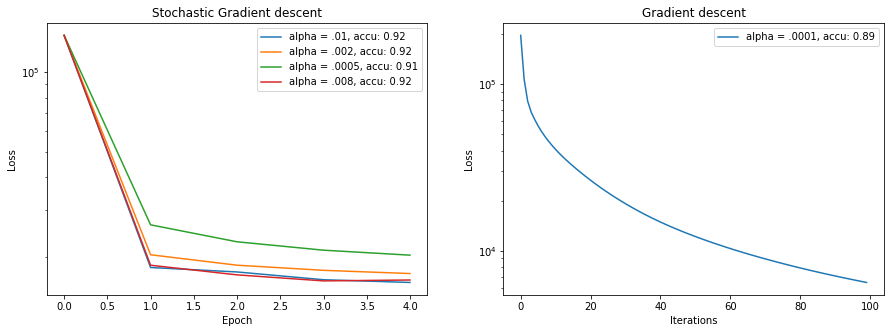

In [0]:
f, axarr = plt.subplots(1,2,figsize=(15,5))

axarr[0].semilogy(SGD1[1],label = 'alpha = .01, accu: '+str(a1))
axarr[0].semilogy(SGD2[1],label = 'alpha = .002, accu: '+str(a2))
axarr[0].semilogy(SGD3[1],label = 'alpha = .0005, accu: '+str(a3))
axarr[0].semilogy(SGD4[1],label = 'alpha = .008, accu: '+str(a4))
axarr[0].legend()
axarr[0].set(xlabel="Epoch",ylabel="Loss")

axarr[1].semilogy(GD[1],label = 'alpha = .0001, accu: '+str(a_GD))
axarr[1].legend()
axarr[1].set(xlabel="Iterations",ylabel="Loss")

axarr[0].set_title('Stochastic Gradient descent')
axarr[1].set_title('Gradient descent')

#### Compare SGD and GD

For SGD, learning rate of 0.01 should be the best optimal rate as the accuracy is high (92%) and using smaller learning rates does not improve accuracy.


Using Gradient descent takes a lot more time than using Stochastic gradient descent.

SGD only needs 5 epoch to reach high accuracy of 92%, with learning step of only .01 but GD needs 100 iterations with a much smaller step of .00001 in order to reach accuracy of 89%, yet its accuracy is still lower than using Stochastic GD

Moreover, SGD converged much quicker than GD. After the 1st epoch, loss value already dropped drastically. From 2nd epoch, the decrease in L value slowed down. For GD, L value could not drop as much as SGD just after the 1st iteration.

### 3. Neural network for MNIST data set - Kaggle challenge

#### Set up

Data used is MNIST train and test set from Kaggle rather than loading from keras

In [0]:
url_train = 'https://raw.githubusercontent.com/Hanh-Nong/StatisticalLearning/master/Homework/Project_03/train.csv'
url_test = 'https://raw.githubusercontent.com/Hanh-Nong/StatisticalLearning/master/Homework/Project_03/test.csv'

In [0]:
train = pd.read_csv(url_train)
x_test = pd.read_csv(url_test)

In [0]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
y_train = train['label']
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [0]:
x_train = train.drop('label', axis = 1)
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
x_train.shape

(42000, 784)

In [0]:
y_train.shape

(42000,)

In [0]:
x_test.shape

(28000, 784)

In [0]:
#after the first run, received warning:
#WARNING:tensorflow:Layer dense_14 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  
#The layer has dtype float32 because it's dtype defaults to floatx.
#x_train.astype('float32')
#x_test.astype('float32')
#normalized:
x_train = x_train/255.0
x_test = x_test/255.0

#### Run Keras Sequential model

4 layers, 10 epochs

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(256, activation = 'relu'),tf.keras.layers.Dense(10)])
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(96, activation = 'relu'))
model.add(tf.keras.layers.Dense(72, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'relu'))
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [0]:
model.compile(optimizer = 'SGD', loss = loss_func, metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1313/1313 [==============================] - 3s 3ms/step - loss: 1.2296 - accuracy: 0.6263
Epoch 2/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.5500 - accuracy: 0.8680
Epoch 3/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.4437 - accuracy: 0.9116
Epoch 4/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.3905 - accuracy: 0.9317
Epoch 5/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.3597 - accuracy: 0.944

In [0]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_107 (Dense)            multiple                  200960    
_________________________________________________________________
dense_108 (Dense)            multiple                  2570      
_________________________________________________________________
dense_109 (Dense)            multiple                  1408      
_________________________________________________________________
dense_110 (Dense)            multiple                  12384     
_________________________________________________________________
dense_111 (Dense)            multiple                  6984      
_________________________________________________________________
dense_112 (Dense)            multiple                  730       
Total params: 225,036
Trainable params: 225,036
Non-trainable params: 0
_______________________________________________

In [0]:
y_test = model.predict(x_test)
y_test.shape

(28000, 10)

In [0]:
y_test

array([[ 0.        ,  0.41282642, 18.303047  , ...,  4.0004544 ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  3.328173  ,
         3.610578  , 10.520025  ],
       ...,
       [ 0.        ,  1.9289936 ,  0.        , ...,  0.2826389 ,
         4.704471  ,  2.737584  ],
       [ 0.        ,  0.        ,  0.        , ...,  2.9611921 ,
         0.05127605, 14.898029  ],
       [ 0.        ,  0.        , 14.818991  , ...,  3.0061297 ,
         0.71688586,  0.        ]], dtype=float32)

In [0]:
predictions = []
for i in range(y_test.shape[0]):
    yi = softmax(y_test[i])
    k = np.argmax(yi)
    predictions.append(k)

In [0]:
predictions[1:20]

[0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0]

In [0]:
ImageID = range(1, len(predictions)+1, 1)
submission = {'ImageID':ImageID,'Label':predictions}
submission = pd.DataFrame(submission)

In [0]:
submission.head()

,ImageID,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [0]:
submission.tail()

,ImageID,Label
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
27999,28000,2


In [0]:
from google.colab import files
submission.to_csv('kaggleMNIST_Hanh.csv', index = False)


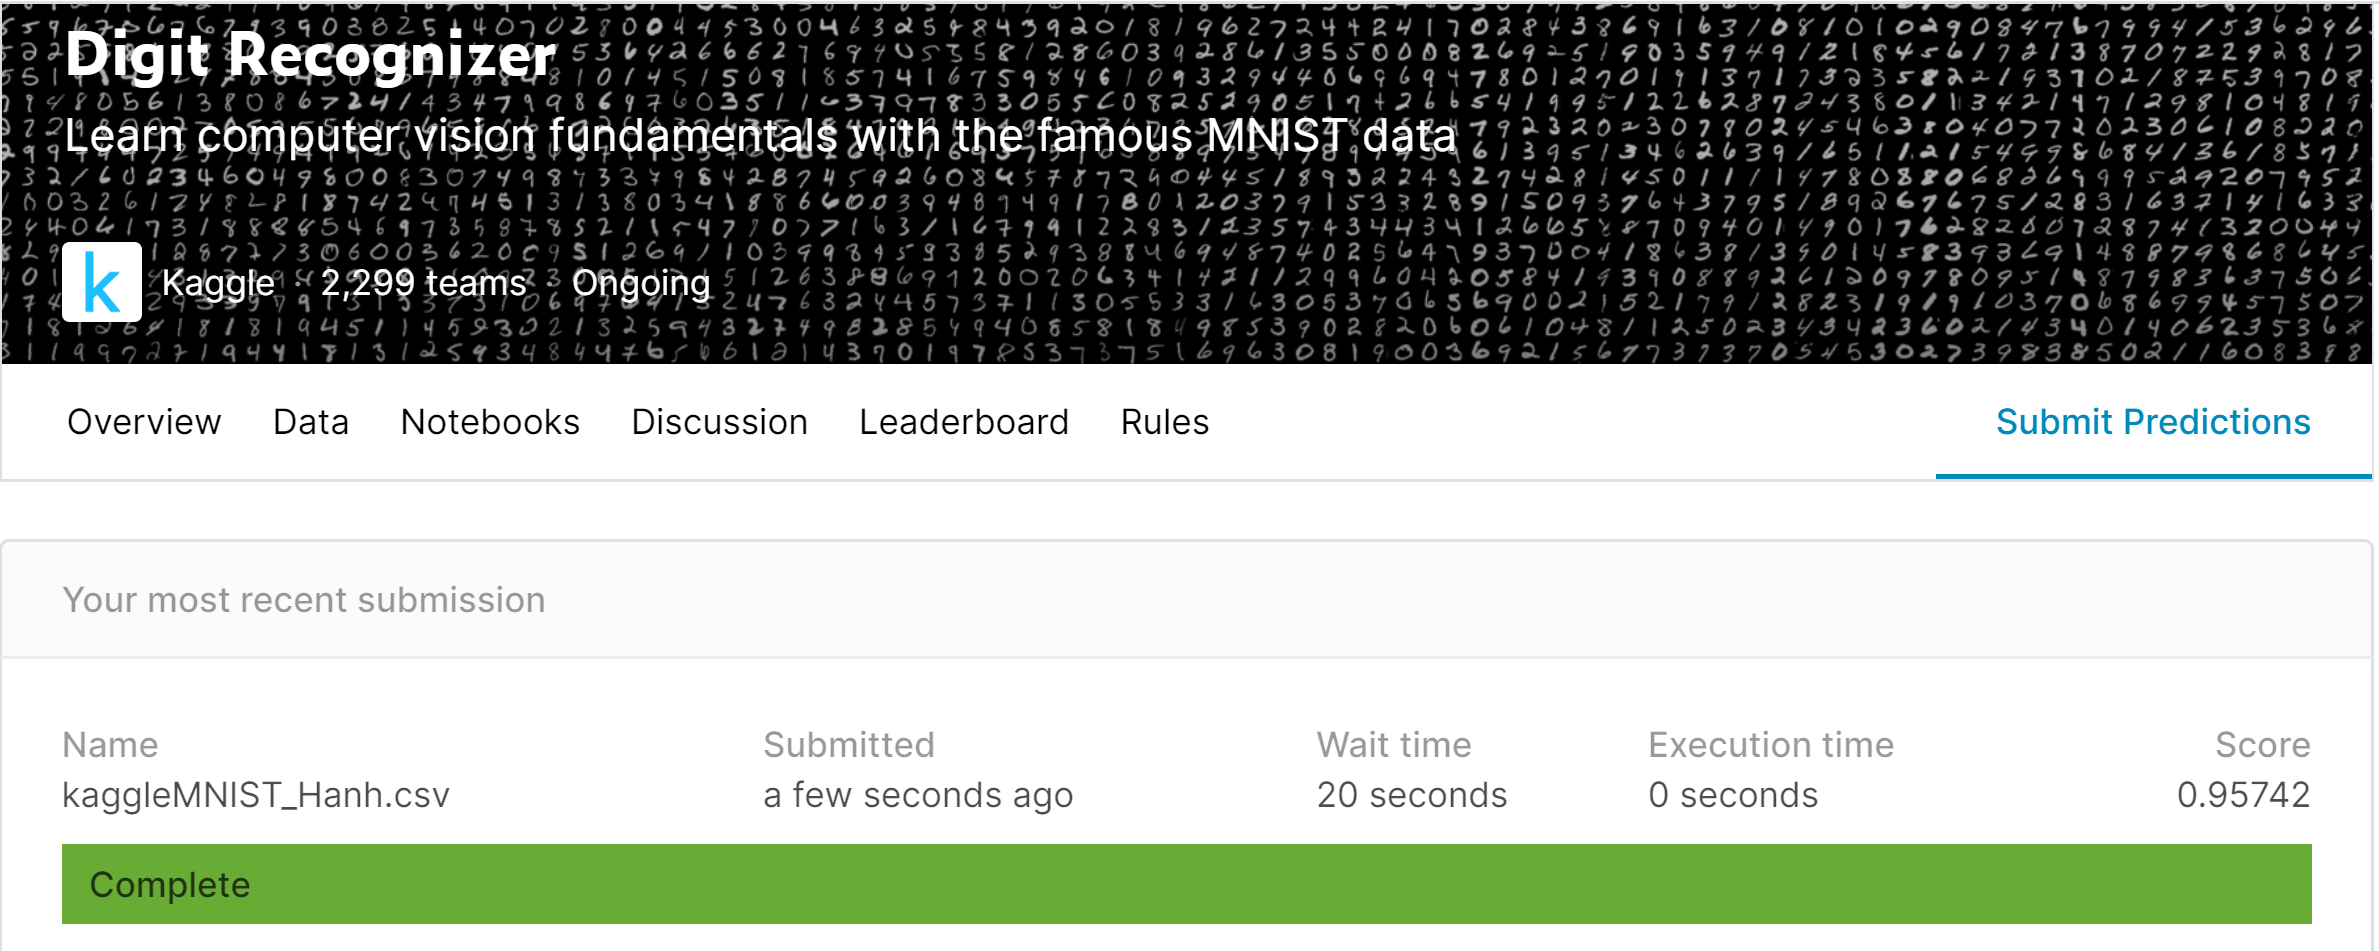